# **Introduction to Pandas**

Pandas is an open-source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is based on the dataframe concept found in the R programming language. For this class, Pandas will be the primary means by which we manipulate data to be processed by neural networks.

In [ ]:
# The following code ensures that Google CoLab is running the correct version of TensorFlow.

try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Connecting to Google Drive 
Sign-in using your Gmail account

In [ ]:
import csv
import sys
import os
import glob
import itertools
import numpy as np
import math
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Loading Data from Google Drive**

In [ ]:
# file_path = 'gdrive/My Drive/Datasets/auto-mpg.csv'
file_path = 'https://people.ucsc.edu/~cchakrab/data/auto-mpg.csv'

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin', 'Car Name']

data_frame = pd.read_csv(file_path,engine='python',skiprows =1,header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
data_frame.head(5)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Custom dataframe slice

In [ ]:
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 5)
display(data_frame)

,MPG,Cylinders,Displacement,...,Model Year,Origin,Car Name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
...,...,...,...,...,...,...,...
396,28.0,4,120.0,...,82,1,ford ranger
397,31.0,4,119.0,...,82,1,chevy s-10


Getting Aggregate Information about our Dataset

In [ ]:
# Strip non-numerics
data_frame = data_frame.select_dtypes(include=['int', 'float'])

headers = list(data_frame.columns.values)
fields = []

for field in headers:
    fields.append({
        'name' : field,
        'mean': data_frame[field].mean(),
        'var': data_frame[field].var(),
        'sdev': data_frame[field].std()
    })

for field in fields:
    print(field)

{'name': 'MPG', 'mean': 23.514572864321615, 'var': 61.089610774274405, 'sdev': 7.815984312565782}
{'name': 'Cylinders', 'mean': 5.454773869346734, 'var': 2.8934154399199943, 'sdev': 1.7010042445332094}
{'name': 'Displacement', 'mean': 193.42587939698493, 'var': 10872.199152247364, 'sdev': 104.26983817119581}
{'name': 'Weight', 'mean': 2970.424623115578, 'var': 717140.9905256768, 'sdev': 846.8417741973271}
{'name': 'Acceleration', 'mean': 15.568090452261291, 'var': 7.604848233611381, 'sdev': 2.7576889298126757}
{'name': 'Model Year', 'mean': 76.01005025125629, 'var': 13.672442818627143, 'sdev': 3.697626646732623}
{'name': 'Origin', 'mean': 1.5728643216080402, 'var': 0.6432920268850575, 'sdev': 0.8020548777266163}


**Converting to a data frame for better display**

In [ ]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)
df2 = pd.DataFrame(fields)
display(df2)

,name,mean,var,sdev
0,MPG,23.514573,61.089611,7.815984
1,Cylinders,5.454774,2.893415,1.701004
2,Displacement,193.425879,10872.199152,104.269838
3,Weight,2970.424623,717140.990526,846.841774
4,Acceleration,15.568090,7.604848,2.757689
5,Model Year,76.010050,13.672443,3.697627
6,Origin,1.572864,0.643292,0.802055


# **Missing Values**

In [ ]:
import os
import pandas as pd

data_frame = pd.read_csv(file_path,engine='python',skiprows =1,header=None, index_col=False,na_values=['NA', '?'])
data_frame.columns = column_names
df = data_frame

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df = df.select_dtypes(include=['int', 'float'])
print(f"horsepower has na? {pd.isnull(df['Horsepower']).values.any()}")
print("Filling missing values...")
med = df['Horsepower'].median()
df['Horsepower'] = df['Horsepower'].fillna(med)
# df = df.dropna() # you can also simply drop NA values
                 
print(f"horsepower has na? {pd.isnull(df['Horsepower']).values.any()}")

horsepower has na? True
Filling missing values...
horsepower has na? False


# **Dropping Fields**

In [ ]:
df = data_frame
print(df.columns)

# Drop the name column
df.drop('Car Name',1,inplace=True)

rows = ['Acceleration','Displacement']

# Drop multiple columns column
df.drop(rows,1,inplace=True)
print(df.columns)


Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin', 'Car Name'],
      dtype='object')
Index(['MPG', 'Cylinders', 'Horsepower', 'Weight', 'Model Year', 'Origin'], dtype='object')


# **Dealing with Outliers**

In [ ]:
# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

data_frame = pd.read_csv(file_path,engine='python',skiprows =1,
                         header=None, index_col=False,na_values=['NA', '?'])
data_frame.columns = column_names
df = data_frame

# Drop the name column
df.drop('Car Name',1,inplace=True)

# create feature vector
med = df['Horsepower'].median()
df['Horsepower'] = df['Horsepower'].fillna(med)
df = df.select_dtypes(include=['int', 'float'])
# Drop outliers in horsepower
print("Length before MPG outliers dropped: {}".format(len(df)))
remove_outliers(df,'MPG',2)
print("Length after MPG outliers dropped: {}".format(len(df)))

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 5)
display(df)

Length before MPG outliers dropped: 398
Length after MPG outliers dropped: 388


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


In [ ]:
import os
import pandas as pd

data_frame = pd.read_csv(file_path,engine='python',
                         skiprows =1,header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
df = data_frame

print(f"Before drop: {list(df.columns)}")
df.drop('Origin', 1, inplace=True)
print(f"After drop: {list(df.columns)}")

Before drop: ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
After drop: ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Car Name']


# **Concatenating Rows and Columns**

In [ ]:
# Create a new dataframe from name and horsepower

import os
import pandas as pd

data_frame = pd.read_csv(file_path,engine='python',skiprows =1,header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
df = data_frame


col_horsepower = df['Horsepower']
col_name = df['Car Name']
result = pd.concat([col_name, col_horsepower], axis=1)

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 5)
display(result)

,Car Name,Horsepower
0,chevrolet chevelle malibu,130
1,buick skylark 320,165
...,...,...
396,ford ranger,79
397,chevy s-10,82


In [ ]:
# Create a new dataframe from first 2 rows and last 2 rows

import os
import pandas as pd

data_frame = pd.read_csv(file_path,engine='python',
                         skiprows =1,header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
df = data_frame

result = pd.concat([df[0:2],df[-2:]], axis=0)

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 0)
display(result)

,MPG,Cylinders,Displacement,...,Model Year,Origin,Car Name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
396,28.0,4,120.0,...,82,1,ford ranger
397,31.0,4,119.0,...,82,1,chevy s-10


# **Training and Validation**

In [ ]:
import os
import pandas as pd
import numpy as np

data_frame = pd.read_csv(file_path,engine='python',
                         skiprows =1,header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
df = data_frame

# Usually a good idea to shuffle
df = df.reindex(np.random.permutation(df.index)) 

mask = np.random.rand(len(df)) < 0.8
trainDF = pd.DataFrame(df[mask])
validationDF = pd.DataFrame(df[~mask])

print(f"Training DF: {len(trainDF)}")
print(f"Validation DF: {len(validationDF)}")

Training DF: 330
Validation DF: 68


# **Converting a Dataframe to a Matrix**

---



In [ ]:
df.values

array([[23.0, 4, 140.0, ..., 75, 1, 'pontiac astro'],
       [20.6, 6, 225.0, ..., 79, 1, 'dodge aspen 6'],
       [18.0, 6, 250.0, ..., 75, 1, 'chevrolet nova'],
       ...,
       [15.0, 8, 429.0, ..., 70, 1, 'ford galaxie 500'],
       [25.5, 4, 122.0, ..., 77, 1, 'plymouth arrow gs'],
       [26.0, 4, 97.0, ..., 74, 2, 'opel manta']], dtype=object)

In [ ]:
df[['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin', 'Car Name']].values

array([[23.0, 4, 140.0, ..., 75, 1, 'pontiac astro'],
       [20.6, 6, 225.0, ..., 79, 1, 'dodge aspen 6'],
       [18.0, 6, 250.0, ..., 75, 1, 'chevrolet nova'],
       ...,
       [15.0, 8, 429.0, ..., 70, 1, 'ford galaxie 500'],
       [25.5, 4, 122.0, ..., 77, 1, 'plymouth arrow gs'],
       [26.0, 4, 97.0, ..., 74, 2, 'opel manta']], dtype=object)

# **Saving a Dataframe to CSV**

In [ ]:
import os
import pandas as pd
import numpy as np

data_frame = pd.read_csv(file_path,engine='python',skiprows =1,
                         header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
df = data_frame
path = 'gdrive/My Drive/Datasets' # The folder must exist in your Google Drive

filename_write = os.path.join(path, "auto-mpg-shuffle.csv")
df = df.reindex(np.random.permutation(df.index))
# Specify index = false to not write row numbers
df.to_csv(file_path, index=False) 
print('Filename and Location: ',filename_write)
print("Done")


Filename and Location:  gdrive/My Drive/Datasets/auto-mpg-shuffle.csv
Done


# **Saving a Dataframe to Pickle**

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle

path = "."

data_frame = pd.read_csv(file_path,engine='python',skiprows =1,
                         header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
df = data_frame

filename_write = os.path.join(path, "auto-mpg-shuffle.pkl")
df = df.reindex(np.random.permutation(df.index))

with open(filename_write,"wb") as fp:
    pickle.dump(df, fp)

filename_read = os.path.join(path, "auto-mpg-shuffle.pkl")

with open(filename_write,"rb") as fp:
    df = pickle.load(fp)

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 5)
display(df)

,MPG,Cylinders,Displacement,...,Model Year,Origin,Car Name
290,15.5,8,351.0,...,79,1,ford country squire (sw)
344,39.0,4,86.0,...,81,1,plymouth champ
...,...,...,...,...,...,...,...
92,13.0,8,351.0,...,73,1,ford ltd
174,18.0,6,171.0,...,75,1,ford pinto


Checking Data Types

In [ ]:
data_frame.dtypes

MPG          float64
Cylinders      int64
              ...   
Origin         int64
Car Name      object
Length: 9, dtype: object

In [ ]:
feature_list = df.columns.tolist()
for feature in feature_list:
  print("Column Name :",feature)
  print("Data Type :", df[feature].dtype)

Column Name : MPG
Data Type : float64
Column Name : Cylinders
Data Type : int64
Column Name : Displacement
Data Type : float64
Column Name : Horsepower
Data Type : object
Column Name : Weight
Data Type : int64
Column Name : Acceleration
Data Type : float64
Column Name : Model Year
Data Type : int64
Column Name : Origin
Data Type : int64
Column Name : Car Name
Data Type : object


# **Analyzing and Visualizing data**

**Exploratory Data Analysis**

In [ ]:
data_frame = pd.read_csv(file_path,engine='python',skiprows =1,
                         header=None,na_values=['-1'], index_col=False)
data_frame.columns = column_names
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Finding the dimensions of the data frame

In [ ]:
# Getting the number of instances and features
print(df.shape)

# Getting the dimensions of the data frame
print(df.ndim)

(398, 9)
2


In [ ]:
df.head(10)

,MPG,Cylinders,Displacement,...,Model Year,Origin,Car Name
290,15.5,8,351.0,...,79,1,ford country squire (sw)
344,39.0,4,86.0,...,81,1,plymouth champ
...,...,...,...,...,...,...,...
132,25.0,4,140.0,...,74,1,chevrolet vega
206,26.5,4,140.0,...,76,1,ford pinto


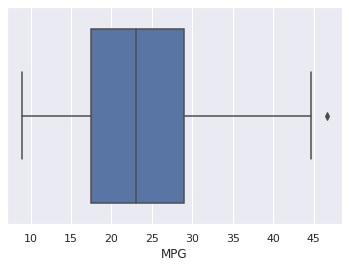

In [ ]:
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

sns.boxplot(x=df['MPG'])

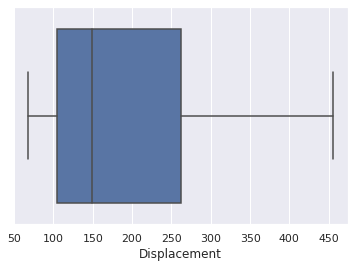

In [ ]:
sns.boxplot(x=df['Displacement'])

In [ ]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.00000,398.00000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.56809,76.01005,1.572864
...,...,...,...,...,...,...,...
75%,29.000000,8.000000,262.000000,3608.000000,17.17500,79.00000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.80000,82.00000,3.000000


In [ ]:
df['MPG'].describe()

count    398.000000
mean      23.514573
            ...    
75%       29.000000
max       46.600000
Name: MPG, Length: 8, dtype: float64

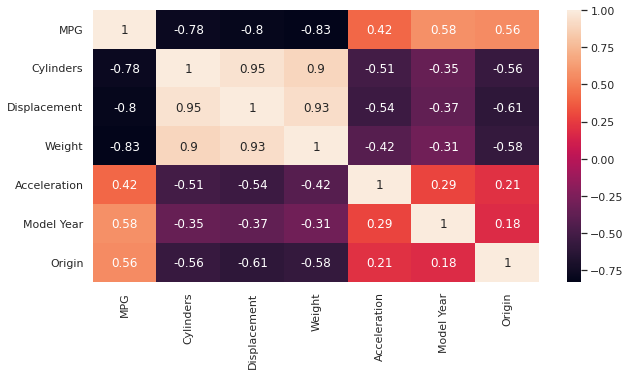

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,annot=True)

In [ ]:
df.head(5)

,MPG,Cylinders,Displacement,...,Model Year,Origin,Car Name
290,15.5,8,351.0,...,79,1,ford country squire (sw)
344,39.0,4,86.0,...,81,1,plymouth champ
285,17.0,8,305.0,...,79,1,chevrolet caprice classic
99,18.0,6,232.0,...,73,1,amc hornet
167,29.0,4,97.0,...,75,3,toyota corolla


In [ ]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin', 'Car Name'],
      dtype='object')

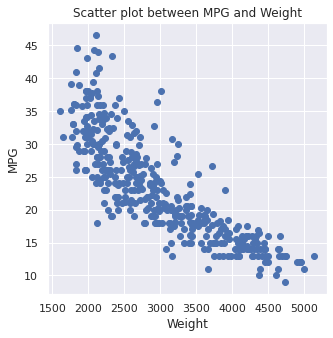

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Weight'], df['MPG'])
plt.title('Scatter plot between MPG and Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.show()

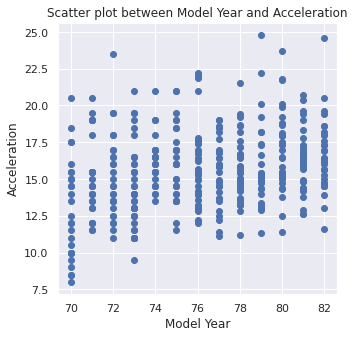

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Model Year'], df['Acceleration'])
plt.title('Scatter plot between Model Year and Acceleration')
ax.set_xlabel('Model Year')
ax.set_ylabel('Acceleration')
plt.show()

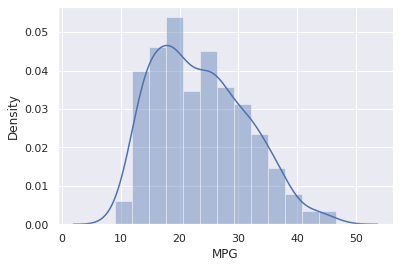

In [ ]:
sns.distplot(df['MPG'])

In [ ]:
data_frame = pd.read_csv(file_path,engine='python',skiprows =1,
                         header=None, index_col=False,na_values=['NA', '?'])

data_frame.columns = column_names
df = data_frame
df.Horsepower = df.Horsepower.astype('float')
df['Horsepower'].dtype

dtype('float64')

In [ ]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [ ]:
data_scale = df.copy()
data_scale ['Displacement'] = scale(data_scale['Displacement'])
data_scale['Horsepower'] = scale(data_scale['Horsepower'])
data_scale ['Acceleration'] = scale(data_scale['Acceleration'])
data_scale ['Weight'] = scale(data_scale['Weight'])
data_scale['MPG'] = scale(data_scale['MPG'])

In [ ]:
data_scale.head()

,MPG,Cylinders,Displacement,...,Model Year,Origin,Car Name
0,0.239362,8,0.617571,...,70,1,chevrolet chevelle malibu
1,0.159574,8,0.728682,...,70,1,buick skylark 320
2,0.239362,8,0.645995,...,70,1,plymouth satellite
3,0.186170,8,0.609819,...,70,1,amc rebel sst
4,0.212766,8,0.604651,...,70,1,ford torino


In [ ]:
df['Country_code'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data_scale.Origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale.head()

,MPG,Cylinders,Displacement,...,Origin,Car Name,Country_code
0,0.239362,8,0.617571,...,1,chevrolet chevelle malibu,USA
1,0.159574,8,0.728682,...,1,buick skylark 320,USA
2,0.239362,8,0.645995,...,1,plymouth satellite,USA
3,0.186170,8,0.609819,...,1,amc rebel sst,USA
4,0.212766,8,0.604651,...,1,ford torino,USA


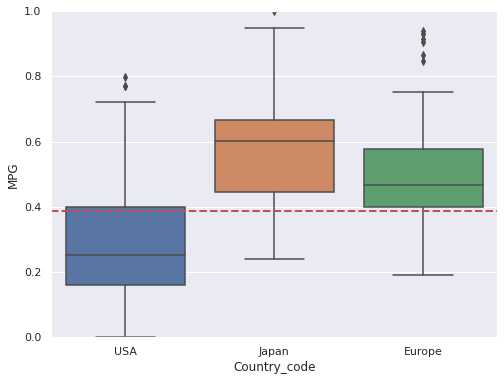

In [ ]:
var = 'Country_code'
data_plt = pd.concat([data_scale['MPG'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MPG", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.MPG.mean(),color='r',linestyle='dashed',linewidth=2)

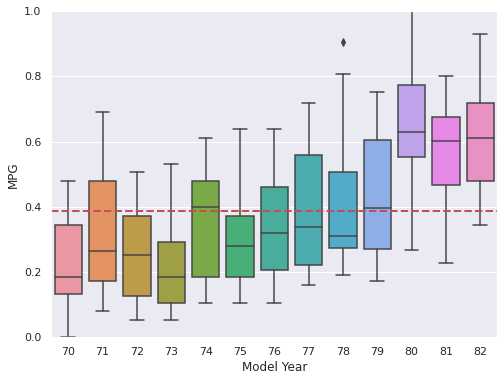

In [ ]:
var = 'Model Year'
data_plt = pd.concat([data_scale['MPG'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MPG", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.MPG.mean(),color='r',linestyle='dashed',linewidth=2)

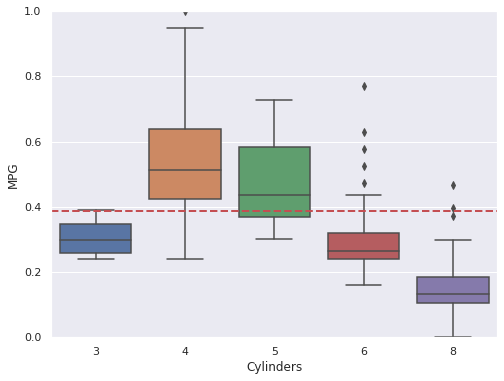

In [ ]:
var = 'Cylinders'
data_plt = pd.concat([data_scale['MPG'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MPG", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.MPG.mean(),color='r',linestyle='dashed',linewidth=2)

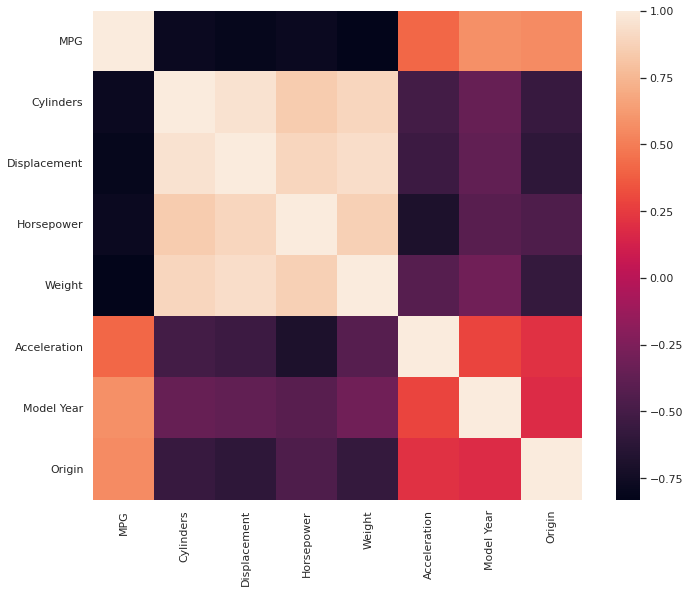

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

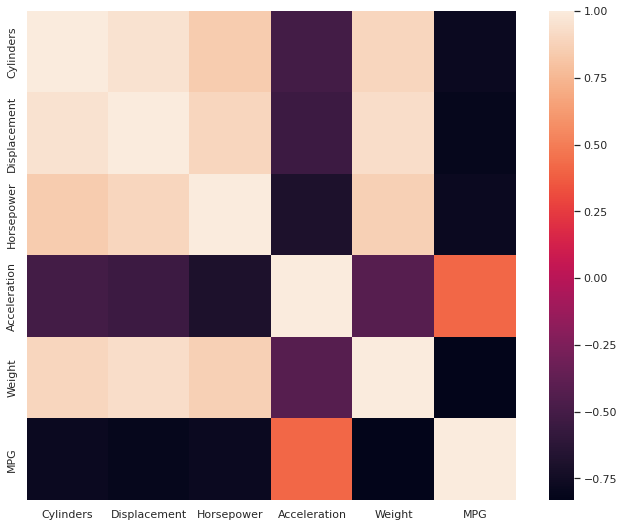

In [ ]:
factors = ['Cylinders','Displacement','Horsepower','Acceleration','Weight','MPG']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

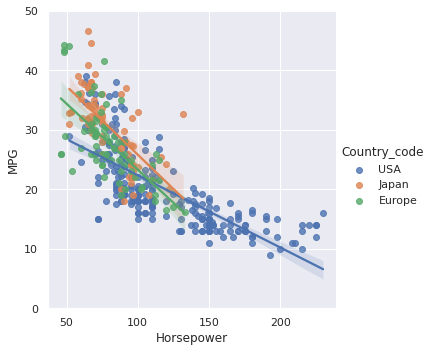

In [ ]:
var = 'Horsepower'
plot = sns.lmplot(var,'MPG',data=df,hue='Country_code')
plot.set(ylim = (0,50))

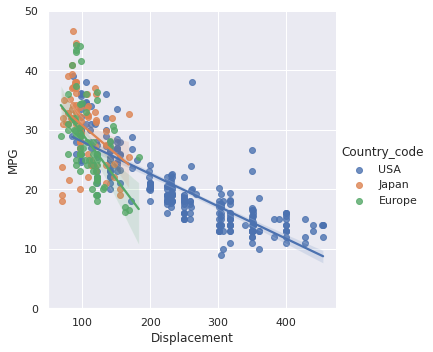

In [ ]:
var = 'Displacement'
plot = sns.lmplot(var,'MPG',data=df,hue='Country_code')
plot.set(ylim = (0,50))

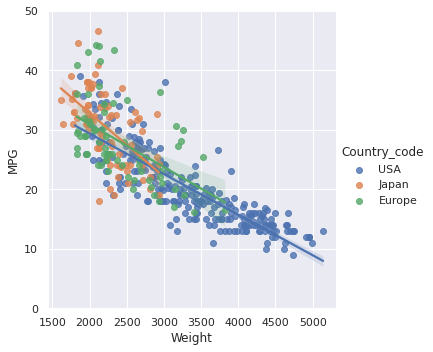

In [ ]:
var = 'Weight'
plot = sns.lmplot(var,'MPG',data=df,hue='Country_code')
plot.set(ylim = (0,50))

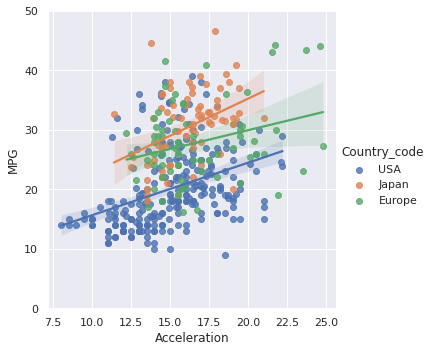

In [ ]:
var = 'Acceleration'
plot = sns.lmplot(var,'MPG',data=df,hue='Country_code')
plot.set(ylim = (0,50))

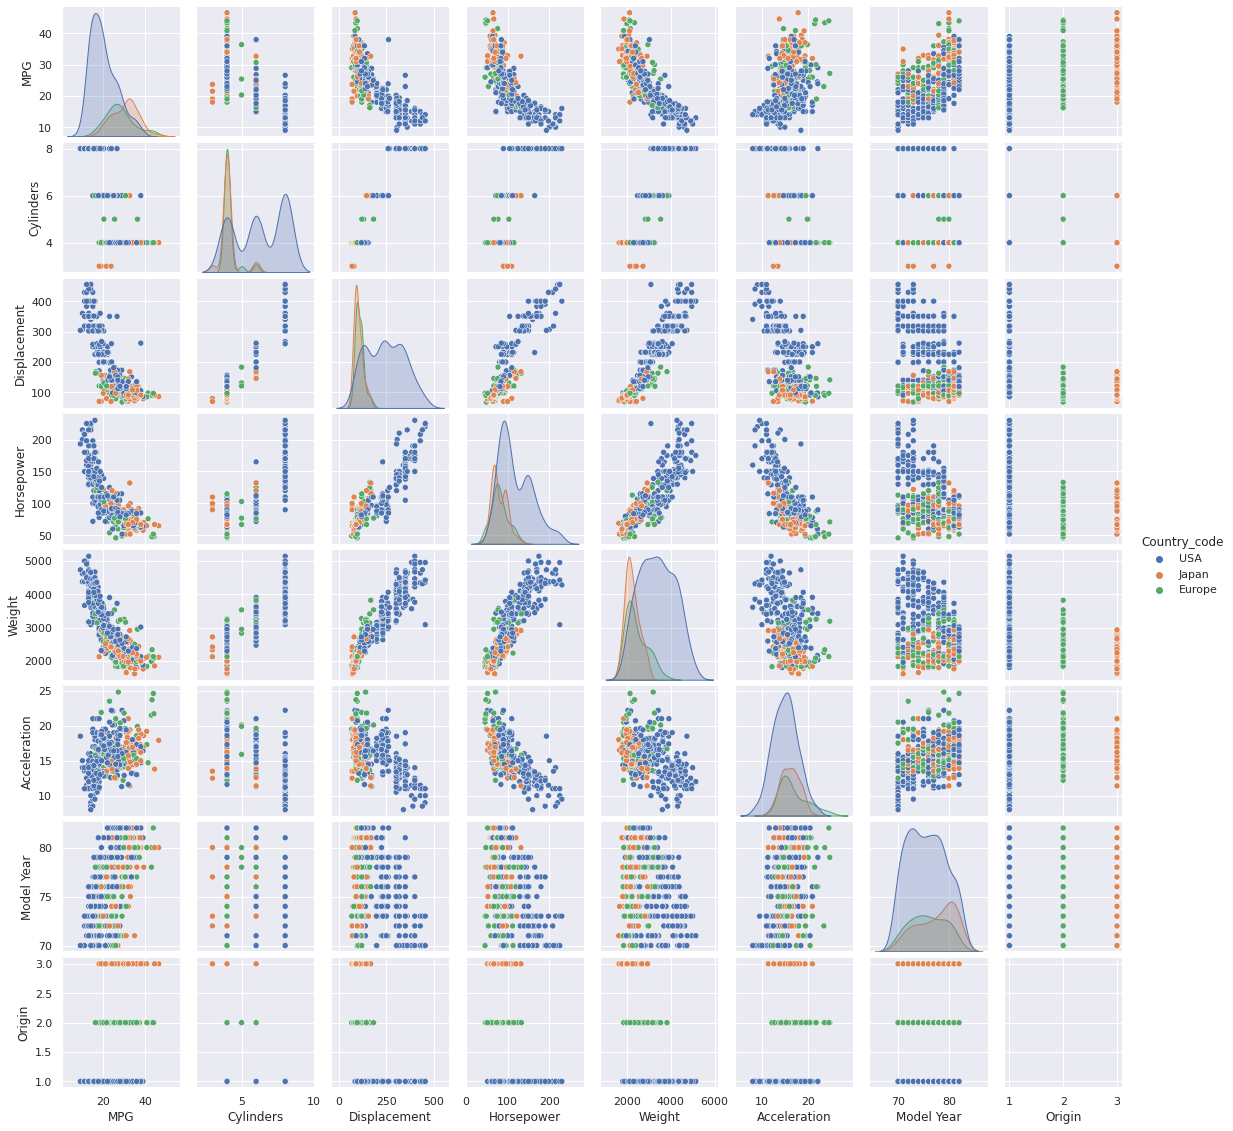

In [ ]:
#scatterplot
sns.set()
sns.pairplot(df, size = 2.0,hue ='Country_code')
plt.show()


# **Our journey so far:**
So far, we have a looked at our data using various pandas methods and visualized it using seaborn package. We looked at

**MPGs relation with discrete variables**


*   MPG distribution over given years if manufacturing
*   MPG distribution by country of origin
*   MPG distribution by number of cylinders

**MPGs relation to other continuous variables:**


*   Pair wise scatter plot of all variables in data. ### Correlation
*   We looked at the correlation heat map of all columns in our data





In [ ]:
print('All done')

All done
